# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [40]:
import pandas as pd
import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {'x_values': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'y_values': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}

student_data =pd.DataFrame(data)

student_data

,x_values,y_values
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

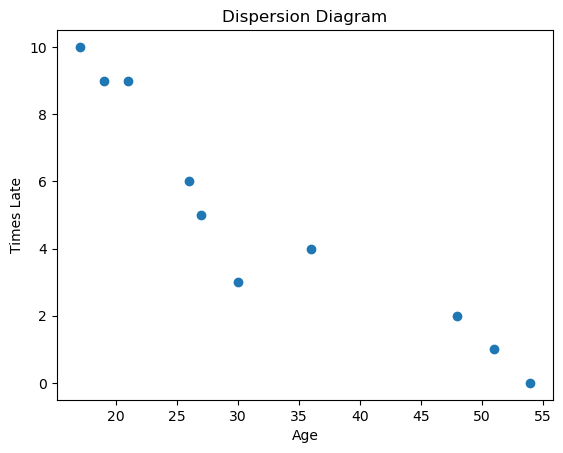

In [41]:
plt.scatter(student_data['x_values'], student_data['y_values'])
plt.xlabel('Age')
plt.ylabel('Times Late')
plt.title('Dispersion Diagram')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [42]:
# The younger you are the more times you are late


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [43]:
# We can see that the corraletion is near 1 so it's very strong
# It is also negative so the varables have una relacio inversament proporcional (when x is bigger, y grows smaller)
# The covariance reaffirms the negative sign.


#correlation:
correlation = student_data.corr()
print("\nCorrelation:")
print(correlation)

#covariance:
covariance = student_data.cov()
print("Covariance:")
print(covariance)


Correlation:
          x_values  y_values
x_values  1.000000 -0.939163
y_values -0.939163  1.000000
Covariance:
            x_values   y_values
x_values  187.655556 -45.566667
y_values  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [44]:
from sklearn import linear_model

x = student_data[['x_values']] # aixo ha de ser un array per aixo te dos parentesis
y = student_data['y_values']

model = linear_model.LinearRegression()
result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

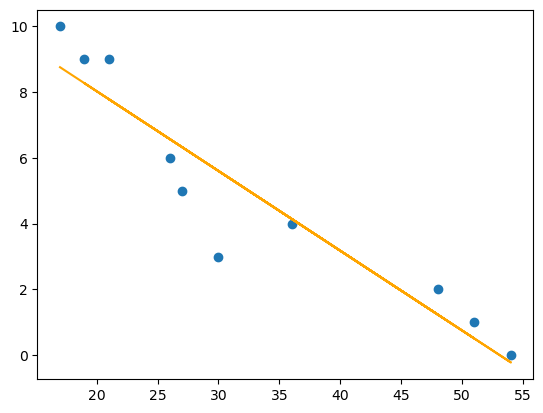

In [45]:
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [46]:
# well, under this model we would say, for example, that the expected Tardiness for a 40 years old is aprox 3.8
# with the liniar regression and the correlation you can say that age is a good predictor of tardiness
# in addition we could calculate r^2 to better measure the accuracy of the model

from sklearn.metrics import mean_squared_error, r2_score
predictions  = result.predict(x)
r2_score(y, predictions) # corr**2



0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
data = pd.read_csv('vehicles.csv')
data.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corrwith(data['CO2 Emission Grams/Mile'])

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [49]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile']
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)
regression_line = result.intercept_ + result.coef_[0]*x

769.8882836465807

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

Miremho amb la standarization

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
result = model.fit(x_scaled, y)
intercept = result.intercept_
coefficients = result.coef_
intercept, coefficients

(475.3163392572124,
 array([ -3.2334676 ,   3.29775166,  85.11361853, -15.54354881,
         16.3793413 ]))

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
import statsmodels.api as sm

# Define the independent variables
X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable
y = data['CO2 Emission Grams/Mile']

# Create the regression model
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [69]:
# Print the summary of the regression model
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                             17:41:30   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Challenge 3: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {'x_values': [1,3,4,6,8,9,11,14], 'y_values': [1,2,4,4,5,7,8,13]}
df =pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

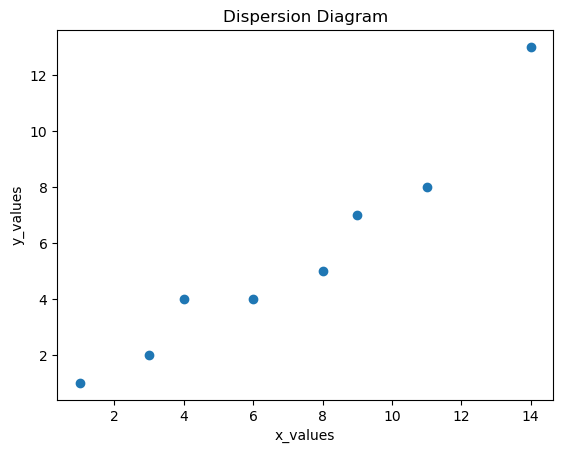

In [ ]:
plt.scatter(df['x_values'], df['y_values'])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Dispersion Diagram')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

-0.43939393939393945

array([0.84848485])

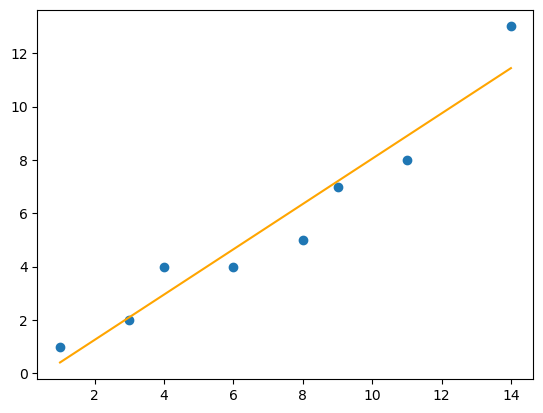

In [ ]:
from sklearn import linear_model

x = df[['x_values']] # aixo ha de ser un array per aixo te dos parentesis
y = df['y_values']

model = linear_model.LinearRegression()
result = model.fit(x,y)

display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# First we evaluate the errors with the outliers

from sklearn.metrics import mean_squared_error, r2_score

predictions  = result.predict(x)
print(r2_score(y, predictions))

0.9316696375519905


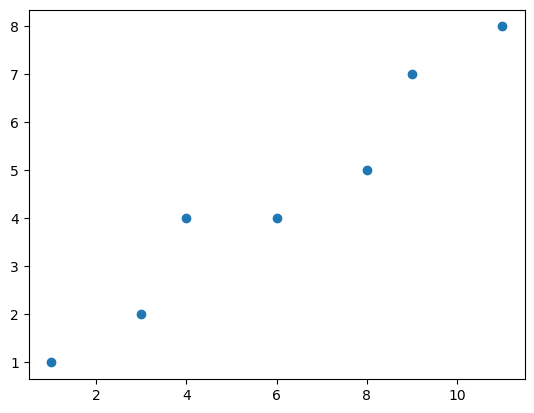

In [ ]:
# Then without the P(14,13)

data = {'x_values': [1,3,4,6,8,9,11], 'y_values': [1,2,4,4,5,7,8]}
df = pd.DataFrame(data)
plt.scatter(df['x_values'], df['y_values'])

0.32330827067669077

array([0.68421053])

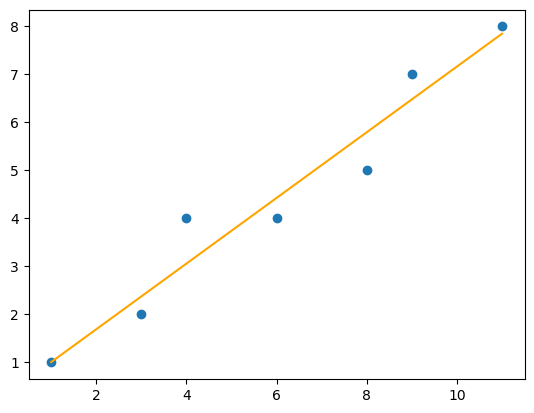

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = df[['x_values']]
y = df['y_values']
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c='orange')
plt.scatter(x,y)

In [ ]:
corr = df['x_values'].corr(df['y_values'])
corr**2

0.9433811802232852

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# In the second case the coefficent (pendent) is much lower therefore without the oulier the impact of X on Y is lower
# R^2 is a bit higher therefore the model explains more accuracy